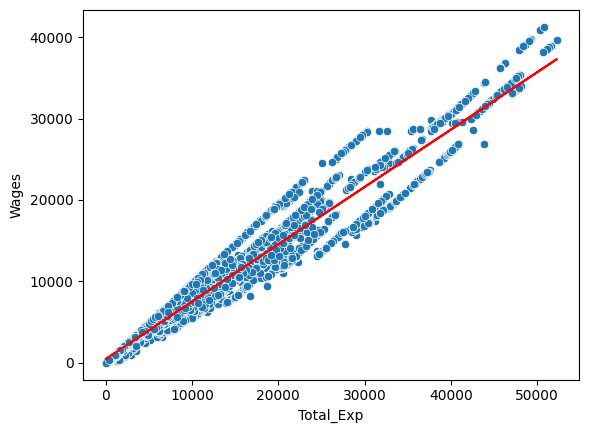

Intercept: 450.9277905169338
Coefficient: [0.70500207]


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataframe
df = pd.read_csv("C:\\Users\\jadit\\OneDrive\\Desktop\\SIT\\SEM-7\\DataScience\\EDA\\submit\\data\\combined.csv")  

# Simple linear regression: Wages ~ Total_Exp
X = df[['Total_Exp']]  # Independent variable
y = df['Wages']        # Dependent variable

model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot
sns.scatterplot(x='Total_Exp', y='Wages', data=df)
plt.plot(df['Total_Exp'], y_pred, color='red')
plt.show()

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


In [2]:
# Multiple linear regression: Wages ~ Total_Exp + Approved_Labour_Budget + Women_Persondays
X = df[['Total_Exp', 'Approved_Labour_Budget', 'Women_Persondays']]
y = df['Wages']

model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 424.5220462422858
Coefficients: [6.53374507e-01 1.21497999e-05 4.27292819e-04]


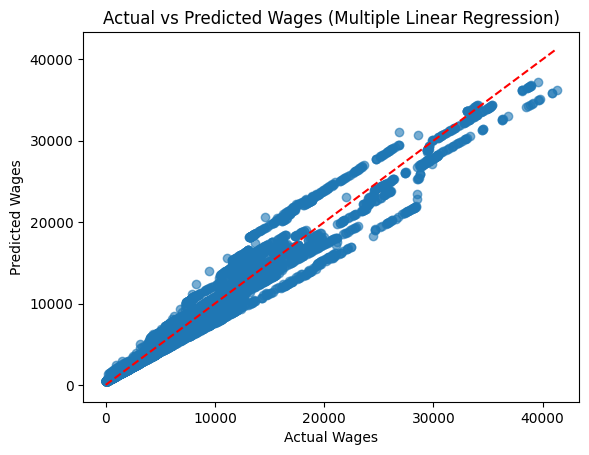

In [5]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred, alpha=0.6)
plt.xlabel("Actual Wages")
plt.ylabel("Predicted Wages")
plt.title("Actual vs Predicted Wages (Multiple Linear Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # perfect fit line
plt.show()


C:\Users\jadit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


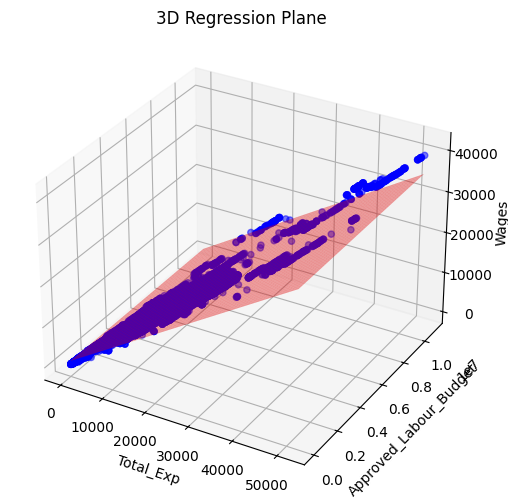

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Total_Exp'], df['Approved_Labour_Budget'], y, color='blue', alpha=0.5)

# Create grid for prediction
x_surf, y_surf = np.meshgrid(
    np.linspace(df['Total_Exp'].min(), df['Total_Exp'].max(), 50),
    np.linspace(df['Approved_Labour_Budget'].min(), df['Approved_Labour_Budget'].max(), 50)
)
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel(),
                              np.full(x_surf.ravel().shape, df['Women_Persondays'].mean())])
z_surf = z_surf.reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.4)

ax.set_xlabel('Total_Exp')
ax.set_ylabel('Approved_Labour_Budget')
ax.set_zlabel('Wages')
plt.title("3D Regression Plane")
plt.show()


--- Starting Backward Elimination ---

Removing 'Approved_Labour_Budget' with p-value: 0.6191
---------------------------------

--- Final Model Summary ---
                            OLS Regression Results                            
Dep. Variable:                  Wages   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.172e+05
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:03:31   Log-Likelihood:                -82903.
No. Observations:                9612   AIC:                         1.658e+05
Df Residuals:                    9609   BIC:                         1.658e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t    

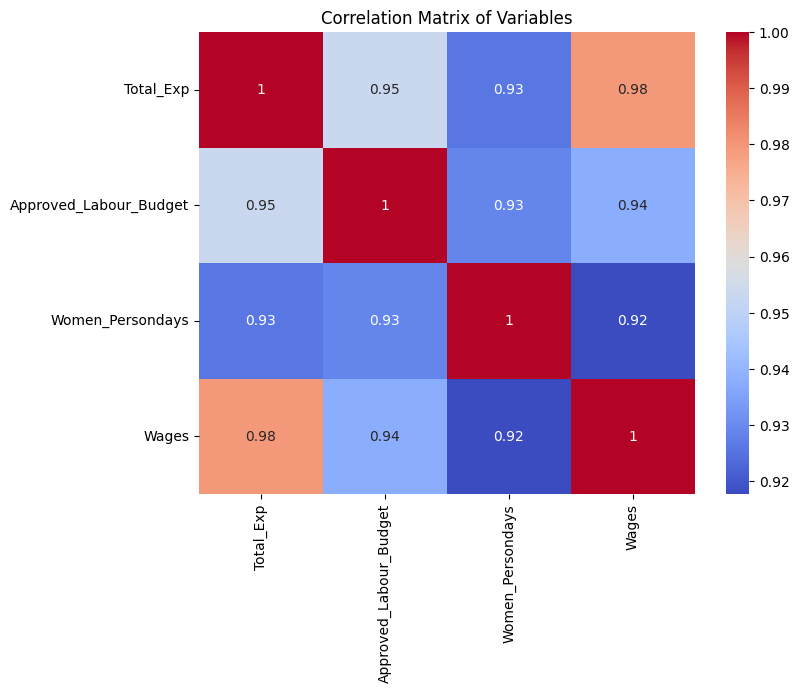

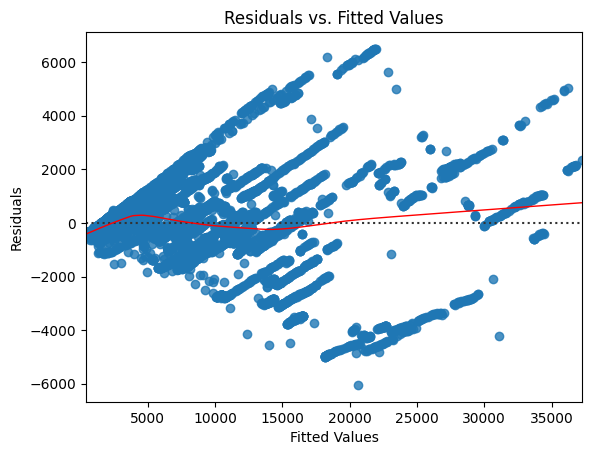

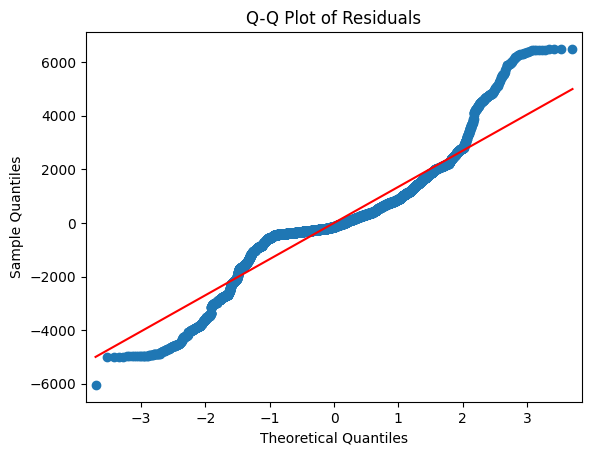

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. Backward Elimination ---

# Load your dataframe (ensure the path is correct)
df = pd.read_csv("..\\data\\combined.csv")

# Define the dependent and independent variables from your multiple regression
X = df[['Total_Exp', 'Approved_Labour_Budget', 'Women_Persondays']]
y = df['Wages']

# Add a constant (intercept) to the model - statsmodels requires this explicitly
X = sm.add_constant(X)

# Set the significance level (a common choice is 0.05)
SL = 0.05

# Get the initial list of features
features = list(X.columns)
print("--- Starting Backward Elimination ---\n")

while (len(features) > 0):
    # Fit the model with the current set of features
    model = sm.OLS(y, X[features]).fit()
    
    # Get the p-values for each feature
    p_values = model.pvalues
    
    # Find the feature with the highest p-value
    max_p_value = p_values.max()
    
    if max_p_value > SL:
        # If the highest p-value is greater than the significance level, remove it
        feature_to_remove = p_values.idxmax()
        features.remove(feature_to_remove)
        print(f"Removing '{feature_to_remove}' with p-value: {max_p_value:.4f}")
        print("---------------------------------")
    else:
        # Otherwise, all remaining features are significant, so we stop
        break

# Display the summary of the final model
final_model = sm.OLS(y, X[features]).fit()
print("\n--- Final Model Summary ---")
print(final_model.summary())


# --- 2. Related Graphs ---

print("\n--- Generating Diagnostic Graphs ---")

# a. Correlation Heatmap of Original Predictors
# This helps visualize multicollinearity (how predictors relate to each other).
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Total_Exp', 'Approved_Labour_Budget', 'Women_Persondays', 'Wages']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

# b. Residuals vs. Fitted Values Plot
# This helps check for non-linear patterns and non-constant variance (heteroscedasticity).
# Ideally, points should be randomly scattered around the horizontal line at 0.
fitted_values = final_model.fittedvalues
residuals = final_model.resid
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# c. Q-Q Plot of Residuals
# This plot checks if the residuals are normally distributed.
# The points should fall closely along the red diagonal line.
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

🧠 Wage Prediction Model — Simple Explanation
🏁 Overall Conclusion

You’ve built a very strong and statistically reliable model to predict wages.
The backward elimination process helped remove an unnecessary variable without hurting accuracy.

However, there’s one warning:
Your remaining variables are closely related, which can cause some overlap (called multicollinearity).

1️⃣ Backward Elimination Step
🔍 What it did

The model started with three variables:

Total_Exp

Approved_Labour_Budget

Women_Persondays

🧩 What it found

Approved_Labour_Budget had a p-value = 0.6191

💡 What it means

A p-value shows how likely it is that a variable has no effect on the outcome.

If p-value > 0.05, the variable isn’t statistically useful.

Since 0.6191 > 0.05, Approved_Labour_Budget was not significant — it didn’t add much value to the model.

✅ So it was removed to keep the model simple.

2️⃣ Final Model Summary
📊 Key Results
Metric	Meaning	Result
R-squared	How much of wage variation is explained by the model	0.961 (Excellent — explains 96.1%)
Intercept (const)	Base wage when other values = 0	425.27
Total_Exp Coefficient	Each 1-unit rise in total expenditure → wages rise by	0.6551
Women_Persondays Coefficient	Each 1-unit rise in women persondays → wages rise by	0.0004
**P>	t	**
🧮 Final Formula
Predicted_Wages = 425.27 + (0.6551 × Total_Exp) + (0.0004 × Women_Persondays)

⚠️ Condition Number Warning

The model showed a large condition number, meaning:

The variables Total_Exp and Women_Persondays might be strongly related.

This doesn’t break the model but means:

Each individual coefficient may not be perfectly reliable.

Their combined effect is still accurate, but one might be “telling the same story” as the other.

3️⃣ What the Graphs Tell You
🔥 Correlation Heatmap

Shows how variables are related.

High correlation (close to 1.0) between:

Total_Exp

Approved_Labour_Budget

Women_Persondays

That’s why removing Approved_Labour_Budget didn’t hurt performance — others already carried similar info.

🌌 Residuals vs. Fitted Plot

Checks if model errors are random.

If points are scattered randomly around zero → ✅ good linear fit.

📈 Q-Q Plot

Checks if errors are normally distributed.

If points fall close to the red line → ✅ normality assumption is satisfied.

🚀 What You Can Improve (Next Steps)
✅ 1. Check for Multicollinearity Properly

The condition number hinted at this, but you can confirm using VIF (Variance Inflation Factor).

VIF Value	Interpretation
< 5	Safe
5–10	Warning zone
> 10	High multicollinearity

You can calculate VIF using:

from statsmodels.stats.outliers_influence import variance_inflation_factor

✅ 2. Use Train/Test Split

Currently, you trained and tested on the same data — that’s like giving someone the answers before the test 😄.

What to do:

Split data before modeling:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train on X_train, y_train

Test on X_test, y_test

Why it matters:
This shows how your model performs on new, unseen data — a true test of real-world accuracy.

🧾 Final Takeaway

✅ Excellent model fit (R² = 0.961)
✅ Correct use of backward elimination
⚠️ Some multicollinearity between predictors
💡 Next: check VIF + use train/test split

Your model is strong, clean, and ready for real-world improvements! 🚀